In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

import sklearn

<h1>Features analysis</h1>

In [80]:
audio_path = '../wavfiles/blues/blues.00038.wav'
x , sr = librosa.load(audio_path)
ipd.Audio(audio_path)

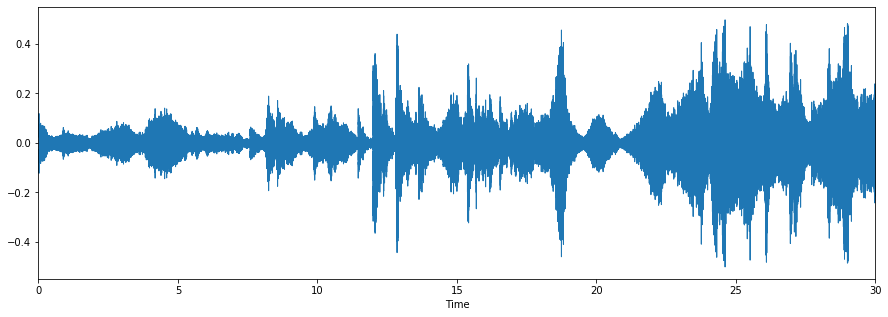

In [87]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)

<h3>MFCC</h3>

In [ ]:
mfccs = librosa.feature.mfcc(x, sr)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<h3>Chroma stft</h3>

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

<h3>Tempo</h3>

In [ ]:
onset_env = librosa.onset.onset_strength(x, sr=sr)
tmp = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

<h3>Pulse</h3>

In [ ]:
onset_env = librosa.onset.onset_strength(x, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)

#Plot something

<h3>Spectral flatness</h3>

In [ ]:
flatness = librosa.feature.spectral_flatness(x)

#Plot something

<h3>Spectral contrast</h3>

In [ ]:
contrast = librosa.feature.spectral_contrast(x)

#Plot something

<h3>Zero crossing</h3>

In [89]:
zero_crossings = librosa.zero_crossings(x, pad=False)

print(zero_crossings)
print(sum(zero_crossings))

#plot spectrum on a specific point in order to explain zero crossing

[False False False ... False False False]
50274


<h3>Others</h3>

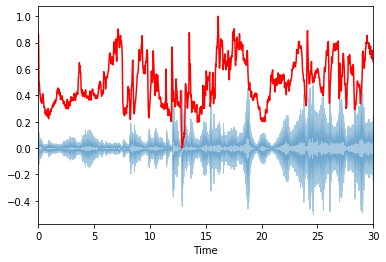

In [90]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

<h1>Feature extraction</h1>

<h3>MFCC</h3>

In [2]:
def mean_mfccs(audio_path):
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(x, sr)
    #mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
    return np.mean(mfccs)

In [5]:
#blues
print("blues :{blues}".format(blues=mean_mfccs('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=mean_mfccs('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=mean_mfccs('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=mean_mfccs('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=mean_mfccs('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=mean_mfccs('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=mean_mfccs('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=mean_mfccs('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=mean_mfccs('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=mean_mfccs('../wavfiles/rock/rock.00038.wav')))

blues :-8.523051261901855
classical :-10.752452850341797
country :-0.9077143669128418
disco :-1.272768497467041
hiphop :2.0951919555664062
jazz :-3.564321517944336
metal :-1.250483512878418
pop :4.532975196838379
reggae :-4.5583415031433105
rock :4.750197887420654


In [3]:
def tempogram(audio_path):
    x , sr = librosa.load(audio_path)
    hop_length = 512
    onset_env = librosa.onset.onset_strength(x, sr=sr)
    tempog = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr, hop_length=hop_length)
    return np.mean(tempog)

tempogram('../wavfiles/blues/blues.00038.wav')

0.1609539874013001

In [62]:
#blues
print("blues :{blues}".format(blues=tempogram('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=tempogram('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=tempogram('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=tempogram('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=tempogram('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=tempogram('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=tempogram('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=tempogram('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=tempogram('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=tempogram('../wavfiles/rock/rock.00038.wav')))


blues :0.1609539874013001
classical :0.2249479935883018
country :0.16217802632833234
disco :0.16943311748283824
hiphop :0.12722912227108457
jazz :0.1876982746400449
metal :0.14018784758389227
pop :0.1077657718824928
reggae :0.09093525667714897
rock :0.20205036892745326


<h3>Chroma stft</h3>

In [4]:
def mean_chroma_stft(audio_path):
    x , sr = librosa.load(audio_path)

    hop_length = 512
    chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
    return np.mean(chromagram)

In [96]:
#blues
print("blues :{blues}".format(blues=mean_chroma_stft('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=mean_chroma_stft('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=mean_chroma_stft('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=mean_chroma_stft('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=mean_chroma_stft('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=mean_chroma_stft('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=mean_chroma_stft('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=mean_chroma_stft('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=mean_chroma_stft('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=mean_chroma_stft('../wavfiles/rock/rock.00038.wav')))


blues :0.2658880949020386
classical :0.2944185435771942
country :0.36740872263908386
disco :0.3706020414829254
hiphop :0.3983396589756012
jazz :0.2856655418872833
metal :0.47039270401000977
pop :0.40041133761405945
reggae :0.3737063705921173
rock :0.41153910756111145


<h3>Tempo</h3>

In [5]:
def tempo(audio_path):
    x , sr = librosa.load(audio_path)
    onset_env = librosa.onset.onset_strength(x, sr=sr)
    tmp = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
    return tmp[0]

In [68]:
#blues
print("blues :{blues}".format(blues=tempo('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=tempo('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=tempo('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=tempo('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=tempo('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=tempo('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=tempo('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=tempo('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=tempo('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=tempo('../wavfiles/rock/rock.00038.wav')))


blues :129.19921875
classical :112.34714673913044
country :151.99908088235293
disco :123.046875
hiphop :92.28515625
jazz :151.99908088235293
metal :95.703125
pop :92.28515625
reggae :95.703125
rock :135.99917763157896


<h3>Pulse</h3>

In [6]:
#Predominant local pulse

def mean_plp(audio_path):
    x , sr = librosa.load(audio_path)
    onset_env = librosa.onset.onset_strength(x, sr=sr)
    pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
    return np.mean(pulse)

In [7]:
#blues
print("blues :{blues}".format(blues=mean_plp('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=mean_plp('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=mean_plp('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=mean_plp('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=mean_plp('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=mean_plp('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=mean_plp('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=mean_plp('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=mean_plp('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=mean_plp('../wavfiles/rock/rock.00038.wav')))


blues :0.15612739324569702
classical :0.12017569690942764
country :0.274291068315506
disco :0.2688504159450531
hiphop :0.22443881630897522
jazz :0.1576428860425949
metal :0.2026132047176361
pop :0.29362937808036804
reggae :0.24281421303749084
rock :0.2450249046087265


<h3>Spectral flatness</h3>

In [8]:
def mean_flatness(audio_path):
    x , sr = librosa.load(audio_path)
    flatness = librosa.feature.spectral_flatness(x)
    return np.mean(flatness)


In [70]:
#blues
print("blues :{blues}".format(blues=mean_flatness('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=mean_flatness('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=mean_flatness('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=mean_flatness('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=mean_flatness('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=mean_flatness('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=mean_flatness('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=mean_flatness('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=mean_flatness('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=mean_flatness('../wavfiles/rock/rock.00038.wav')))


blues :0.001087802229449153
classical :0.0005564010934904218
country :0.03848777711391449
disco :0.08231886476278305
hiphop :0.11177846789360046
jazz :0.0014940426917746663
metal :0.010408284142613411
pop :0.08837561309337616
reggae :0.004505937919020653
rock :0.04875651001930237


<h3>Spectral contrast</h3>

In [9]:
def mean_contrast(audio_path):
    x , sr = librosa.load(audio_path)
    contrast = librosa.feature.spectral_contrast(x)
    return np.mean(contrast)

In [84]:
#blues
print("blues :{blues}".format(blues=mean_contrast('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=mean_contrast('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=mean_contrast('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=mean_contrast('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=mean_contrast('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=mean_contrast('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=mean_contrast('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=mean_contrast('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=mean_contrast('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=mean_contrast('../wavfiles/rock/rock.00038.wav')))


blues :27.195260742803693
classical :22.754632656257222
country :18.739723904311212
disco :18.611181688649616
hiphop :17.431060013105686
jazz :23.137283050719166
metal :21.72247397300825
pop :17.720645024089617
reggae :22.533411876856857
rock :17.36138444887957


<h3>Zero crossing</h3>

In [10]:
def zero_crossing(audio_path):
    x , sr = librosa.load(audio_path)
    zero_crossings = librosa.zero_crossings(x, pad=False)
    return sum(zero_crossings)


In [90]:
#blues
print("blues :{blues}".format(blues=zero_crossing('../wavfiles/blues/blues.00038.wav')))

#classical
print("classical :{classical}".format(classical=zero_crossing('../wavfiles/classical/classical.00038.wav')))

#country
print("country :{country}".format(country=zero_crossing('../wavfiles/country/country.00038.wav')))

#disco
print("disco :{disco}".format(disco=zero_crossing('../wavfiles/disco/disco.00038.wav')))

#hiphop
print("hiphop :{hiphop}".format(hiphop=zero_crossing('../wavfiles/hiphop/hiphop.00038.wav')))

#jazz
print("jazz :{jazz}".format(jazz=zero_crossing('../wavfiles/jazz/jazz.00038.wav')))

#metal
print("metal :{metal}".format(metal=zero_crossing('../wavfiles/metal/metal.00038.wav')))

#pop
print("pop :{pop}".format(pop=zero_crossing('../wavfiles/pop/pop.00038.wav')))

#reggae
print("reggae :{reggae}".format(reggae=zero_crossing('../wavfiles/reggae/reggae.00038.wav')))

#rock
print("rock :{rock}".format(rock=zero_crossing('../wavfiles/rock/rock.00038.wav')))


blues :29406
classical :50274
country :80303
disco :111436
hiphop :65887
jazz :44003
metal :98230
pop :97078
reggae :43418
rock :93100


<h1>Dataset implementation</h1>

In [11]:
def data_set():
    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    features_genres = []
    all_songs = []
    all_mean_mfccs = []
    all_mean_chroma_stft = []
    all_tempo = []
    all_mean_pulse = []
    all_mean_flatness = []
    all_mean_contrast = []
    all_zero_crossing = []
    features_names = ['song' ,
                      'mean_mfccs' , 
                      'mean_chroma_stft' , 
                      'tempo' , 
                      'pulse' , 
                      'flatness' , 
                      'contrast' ,
                      'zero_crossing' ,
                      'genre']
    for genre in genres :
        print(genre)
        songs = []
        for k in range(100):
            if((k+1) % 25 == 0):
                print(k+1)
            features = []
            song = genre + '.' + format(k, '05d') + '.wav'
            song_url = '../wavfiles/' + genre + '/' + song
            features_genres.append(genre)
            all_mean_mfccs.append(mean_mfccs(song_url))
            all_mean_chroma_stft.append(mean_chroma_stft(song_url))
            all_tempo.append(tempo(song_url))
            all_mean_pulse.append(mean_plp(song_url))
            all_mean_flatness.append(mean_flatness(song_url))
            all_mean_contrast.append(mean_contrast(song_url))
            all_zero_crossing.append(zero_crossing(song_url))
            songs.append(song)
        all_songs = all_songs + songs

    df = pd.DataFrame({features_names[0] : all_songs ,
                       features_names[1] : all_mean_mfccs ,
                       features_names[2] : all_mean_chroma_stft , 
                       features_names[3] : all_tempo,
                       features_names[4] : all_mean_pulse ,
                       features_names[5] : all_mean_flatness ,
                       features_names[6] : all_mean_contrast ,
                       features_names[7] : all_zero_crossing ,
                       features_names[8] : features_genres })
    return df

In [12]:
data_set = data_set()

blues
24
49
74
99
classical
24
49
74
99
country
24
49
74
99
disco
24
49
74
99
hiphop
24
49
74
99
jazz
24
49
74
99
metal
24
49
74
99
pop
24
49
74
99
reggae
24
49
74
99
rock
24
49
74
99


In [13]:
data_set

,song,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,genre
0,blues.00000.wav,1.938016,0.350088,123.046875,0.274049,0.004498,20.526699,55031,blues
1,blues.00001.wav,-0.055611,0.340914,107.666016,0.268452,0.002298,20.676128,37139,blues
2,blues.00002.wav,1.034164,0.363637,161.499023,0.264260,0.002631,22.197517,50563,blues
3,blues.00003.wav,0.071344,0.404785,172.265625,0.259775,0.000954,21.426268,22077,blues
4,blues.00004.wav,-8.458839,0.308526,135.999178,0.213662,0.003238,21.466338,67225,blues
...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,-1.724619,0.352063,103.359375,0.233755,0.006552,22.983616,59124,rock
996,rock.00096.wav,-1.761153,0.398687,117.453835,0.230761,0.006468,22.671100,64737,rock
997,rock.00097.wav,-2.664267,0.432142,129.199219,0.239898,0.007545,22.313995,80747,rock
998,rock.00098.wav,-2.238330,0.362485,112.347147,0.260936,0.001715,22.496897,32292,rock


In [14]:
data_set.to_csv('../MusicGenreClassification/Music_data_set.csv')
